# Machine Learning Fundamentals and Types

This notebook explores the **three major paradigms of machine learning** — Supervised, Unsupervised, and Reinforcement Learning.

We’ll move beyond definitions into runnable examples that illustrate how algorithms learn from data, identify structure, and make decisions under constraints.

---
### Objectives
- Understand how ML differs from rule-based programming
- Explore supervised, unsupervised, and reinforcement learning
- Implement hands-on demos for each paradigm
- Compare the learning mechanisms and use cases

## 🧠 1. From Rules to Learning

In classical programming, we define explicit rules:
```python
data + rules → answers
```

In machine learning, we flip the logic:
```python
data + answers → rules
```

This is the essence of learning — instead of being told what to do, the machine **derives the rules** from patterns.

In [1]:
from graphviz import Digraph

g = Digraph('ML_Pipeline', format='png')
g.attr(rankdir='LR', size='7,3')

g.attr('node', shape='ellipse', style='filled', fillcolor='lightyellow')
g.node('A', 'Input Data')
g.node('B', 'Learning Algorithm')
g.node('C', 'Model')
g.node('D', 'Predictions / Actions')

g.edges(['AB', 'BC', 'CD'])
g.attr(label='Machine Learning Flow: Data → Learning → Model → Output')
g.render('ml_pipeline', view=True)

'ml_pipeline.png'

## 🧩 2. Supervised Learning

**Supervised learning** uses *labeled data* — where we already know the correct answer. The model learns to map inputs to outputs.

We’ll build two quick examples:
1. **Classification** – Predicting whether a transaction is fraudulent.
2. **Regression** – Predicting housing prices.

In [2]:
# --- Classification Example ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

np.random.seed(0)
data = pd.DataFrame({
    'amount': np.random.randint(100, 10000, 200),
    'frequency': np.random.randint(1, 10, 200)
})
data['fraud'] = np.where((data['amount'] > 7000) & (data['frequency'] > 6), 1, 0)

X = data[['amount', 'frequency']]
y = data['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Classification Accuracy: {accuracy_score(y_test, preds)*100:.2f}%')

Classification Accuracy: 96.67%


In [3]:
# --- Regression Example ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

np.random.seed(10)
size = np.random.randint(600, 2500, 100)
price = size * 300 + np.random.randint(-20000, 20000, 100)

X = size.reshape(-1, 1)
y = price

reg = LinearRegression()
reg.fit(X, y)

pred = reg.predict(X)
mae = mean_absolute_error(y, pred)
print(f'Mean Absolute Error: ₹{mae:.0f}')

Mean Absolute Error: ₹9599


In **supervised learning**, the model continuously compares its predictions with the true answers and updates parameters to minimize error.

## 🧭 3. Unsupervised Learning

**Unsupervised learning** deals with unlabeled data. The goal is to uncover hidden structures or patterns.

Let’s perform a simple clustering task using **K-Means**.

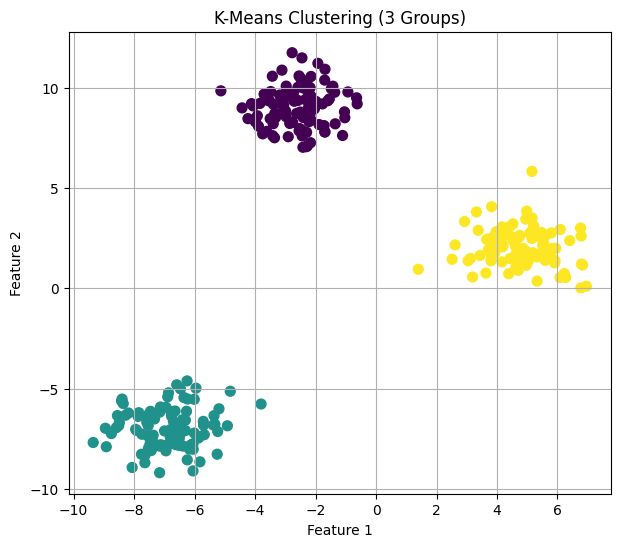

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (3 Groups)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Unlike supervised models, clustering doesn’t need labels. The algorithm finds natural groupings within the dataset.

## 🕹️ 4. Reinforcement Learning

In **Reinforcement Learning (RL)**, an *agent* interacts with an *environment* to achieve a goal. It learns through **rewards** (positive feedback) and **penalties** (negative feedback).

We’ll simulate a very basic grid-world environment where an agent learns to reach a goal.

In [5]:
import numpy as np
import random

states = list(range(5))  # 5 states in a simple environment
actions = ['left', 'right']

# Q-table initialization
Q = np.zeros((len(states), len(actions)))
goal_state = 4

alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
episodes = 100

for _ in range(episodes):
    state = 0
    while state != goal_state:
        action = random.choice(actions)
        next_state = state + 1 if action == 'right' else max(0, state - 1)
        reward = 1 if next_state == goal_state else -0.01
        action_idx = actions.index(action)
        next_action_idx = actions.index('right') if next_state < goal_state else 0

        # Q-learning update rule
        Q[state, action_idx] = Q[state, action_idx] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action_idx])
        state = next_state

print('Trained Q-Table:')
print(Q.round(2))

Trained Q-Table:
[[0.62 0.7 ]
 [0.62 0.79]
 [0.7  0.89]
 [0.79 1.  ]
 [0.   0.  ]]


Over multiple episodes, the agent learns that moving **right** consistently leads to rewards. This is the simplest example of **policy learning** — discovering the best action for each state.

## 🧾 5. Summary — Comparing Learning Types

| Learning Type | Requires Labels? | Learns From | Goal | Common Applications |
|----------------|------------------|--------------|-------|----------------------|
| **Supervised** | ✅ Yes | Labeled data | Predict outputs | Classification, Regression |
| **Unsupervised** | ❌ No | Unlabeled data | Discover patterns | Clustering, Anomaly Detection |
| **Reinforcement** | ❌ No (Feedback only) | Trial & error | Maximize reward | Robotics, Games, Optimization |

Machine learning systems evolve by combining all three — supervised for pattern recognition, unsupervised for structure discovery, and reinforcement for adaptive decision-making.